# <center>Credit risk prediction using Random Forest

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("final_project_data\loan.csv", low_memory = False)

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(887379, 74)

In [6]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,433067.000000,137053.000000,887350.000000,887350.000000,8.873790e+05,886877.000000,887350.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,221703.000000,887379.0,511.000000,509.000000,887350.000000,8.171030e+05,8.171030e+05,21372.000000,21372.000000,21372.000000,21372.000000,20810.000000,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,0.694623,34.063798,70.117903,11.548469,0.195307,1.692079e+04,55.067693,25.268026,8403.124852,8399.713242,7558.826684,7521.160306,5757.706424,1754.804327,0.396692,45.919243,4.880757,2164.145585,0.014380,44.104838,1.0,109981.011585,18.310118,0.004991,2.257026e+02,1.394582e+05,1.109021,2.928832,0.761651,1.674574,20.912686,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,0.998448,21.884940,28.127914,5.317313,0.582091,2.242679e+04,23.834344,11.840561,8493.450269,8489.997617,7871.243336,7846.108604,6625.441046,2095.356099,4.087825,409.693874,63.125281,4794.783233,0.134191,22.179841,0.0,52730.379847,7.169233,0.077625,1.031137e+04,1.537500e+05,1.242675,3.089987,0.996035,1.688725,27.209081,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.443000e+03,37.700000,17.000000,0.000000,0.000000,1914.590000,1899.700000,1200.570000,441.460000,0.000000,0.000000,0.000000,280.170000,0.000000,27.000000,1.0,76032.500000,13.200000,0.000000,0.000000e+00,2.985300e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.187500e+04,56.000000,24.000000,6458.290000,6455.810000,4894.999117,4862.010000,3215.320000,1073.280000,0.000000,0.000000,0.000000,462.780000,0.000000,44.000000,1.0,101771.000000,17.610000,0.000000,0.000000e+00,8.055900e+04,1.000000,2.000000,0.000000,1.000000,12.000000,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.0000

## Data Exploration

In [7]:
# define categorical variables and numerical variables
cat_var=df.select_dtypes(include=["object"]).columns
num_var=df.select_dtypes(include=["int","float"]).columns

#### Categorical variables

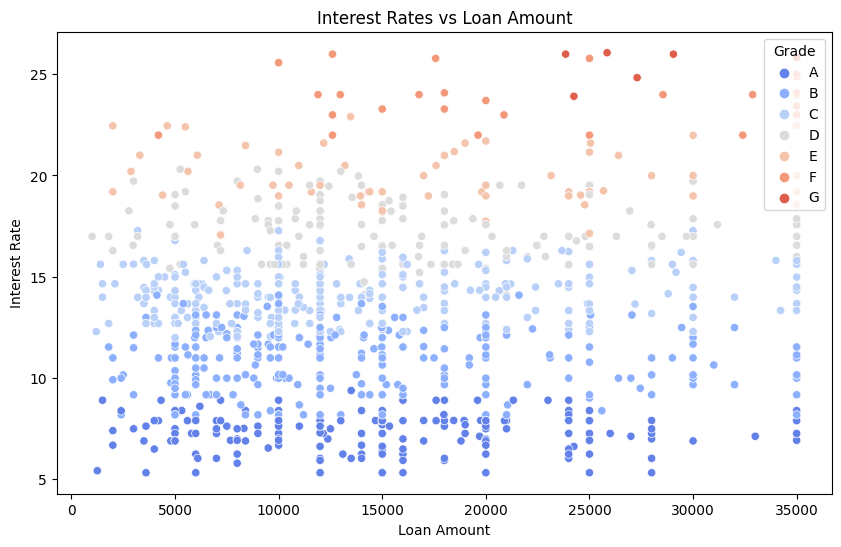

In [8]:
# Define the desired order for the 'grade' variable (alphabetical sorting)
grade_order = sorted(df['grade'].unique())

# Define a custom color palette with colors in increasing order
custom_palette = sns.color_palette("coolwarm", len(grade_order))

sample_size = 1000  # Adjust this to your desired sample size
sampled_data = df.sample(sample_size)

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_amnt', y='int_rate', hue='grade', hue_order=grade_order, 
                data=sampled_data, palette=custom_palette)

# Add labels and title
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.title('Interest Rates vs Loan Amount')

# Show legend and customize the legend title
plt.legend(title='Grade', loc='upper right')

# Display the plot
plt.show()

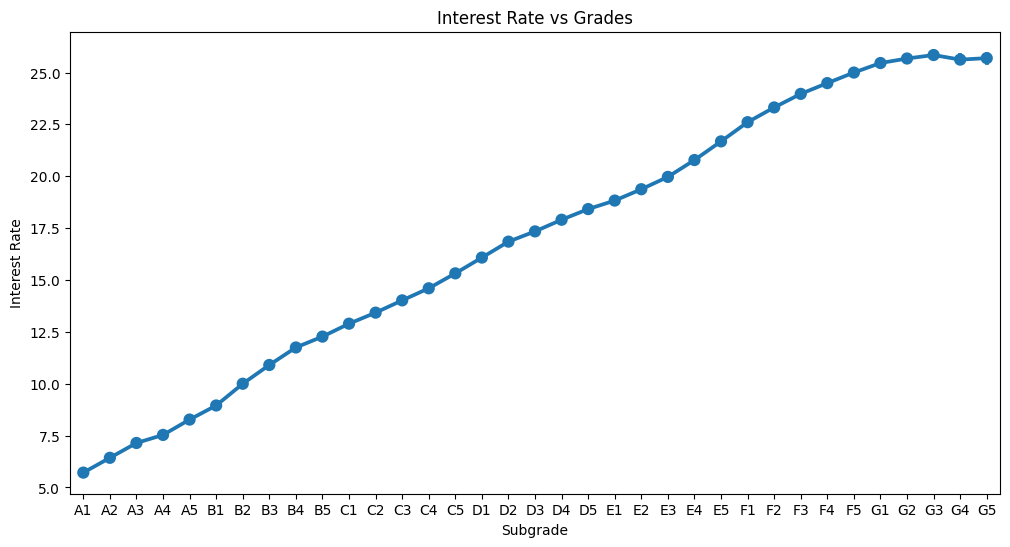

In [9]:
# Change in interest rates with changes in grades
plt.figure(figsize=(12, 6))
sns.pointplot(x='sub_grade', y='int_rate', data=df, order=sorted(df['sub_grade'].unique()))
plt.title("Interest Rate vs Grades")
plt.xlabel("Subgrade")
plt.ylabel("Interest Rate")
plt.xticks()
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


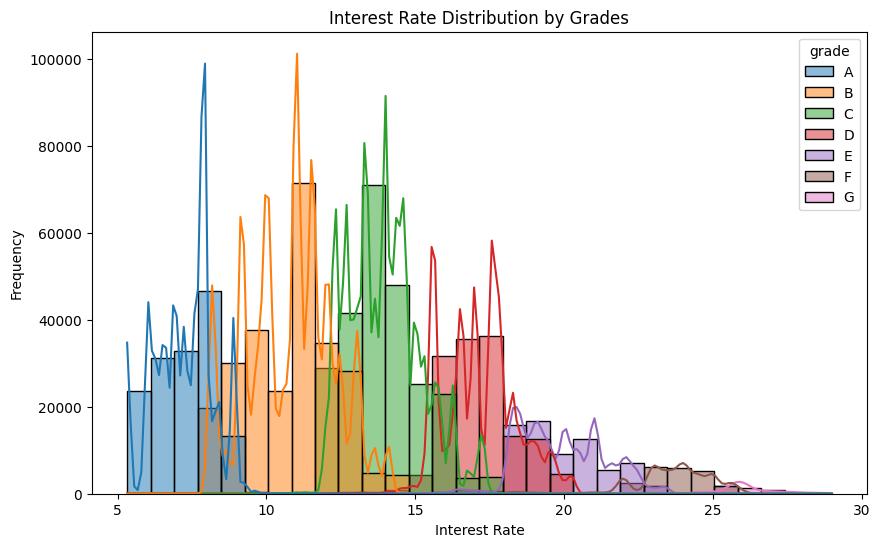

In [10]:
# Create a histogram plot of interest rates grouped by grades
plt.figure(figsize=(10, 6))

# Define a custom color palette with colors in increasing order
custom_palette = sns.color_palette("coolwarm", len(grade_order))

sns.histplot(data=df, x='int_rate', hue='grade',hue_order=grade_order, bins=30, kde=True)
plt.title('Interest Rate Distribution by Grades')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

In [11]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

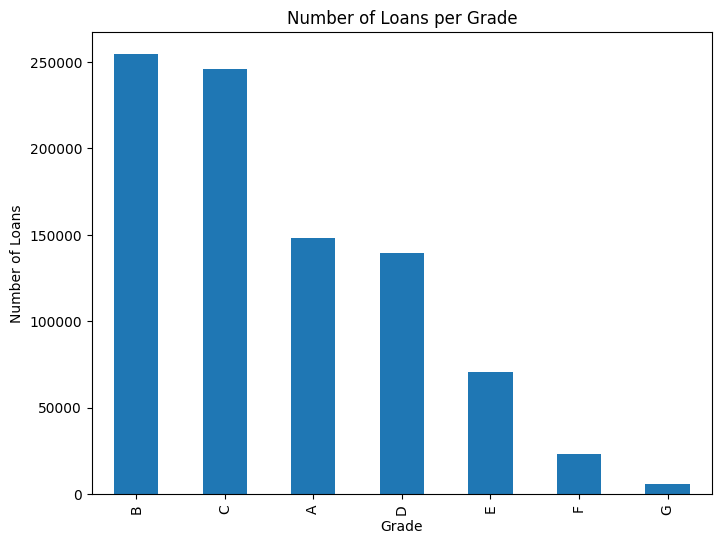

In [12]:
# Count the number of occurrences of each grade
grade_counts = df['grade'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
grade_counts.plot(kind='bar')
plt.title('Number of Loans per Grade')
plt.xlabel('Grade')
plt.ylabel('Number of Loans')
plt.xticks()

# Show the plot
plt.show()

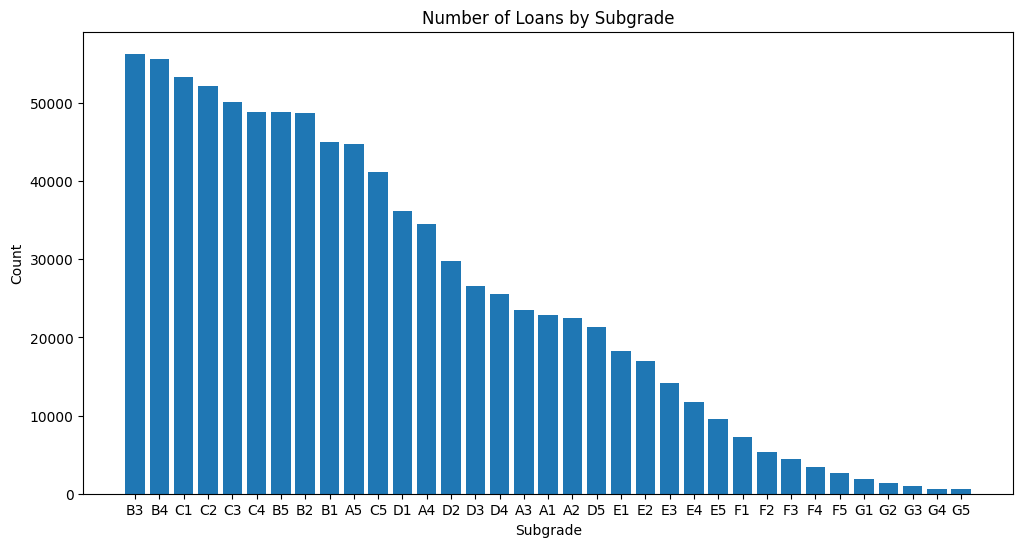

In [13]:
# Group the data by subgrade and count the number of occurrences
subgrade_counts = df['sub_grade'].value_counts()

# Create a DataFrame from the counts
subgrade_counts_df = pd.DataFrame({'Subgrade': subgrade_counts.index, 'Count': subgrade_counts.values})

# Plot the stacked bar chart
plt.figure(figsize=(12, 6))
plt.bar(subgrade_counts_df['Subgrade'], subgrade_counts_df['Count'])
plt.xlabel('Subgrade')
plt.ylabel('Count')
plt.title('Number of Loans by Subgrade')
plt.xticks()
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


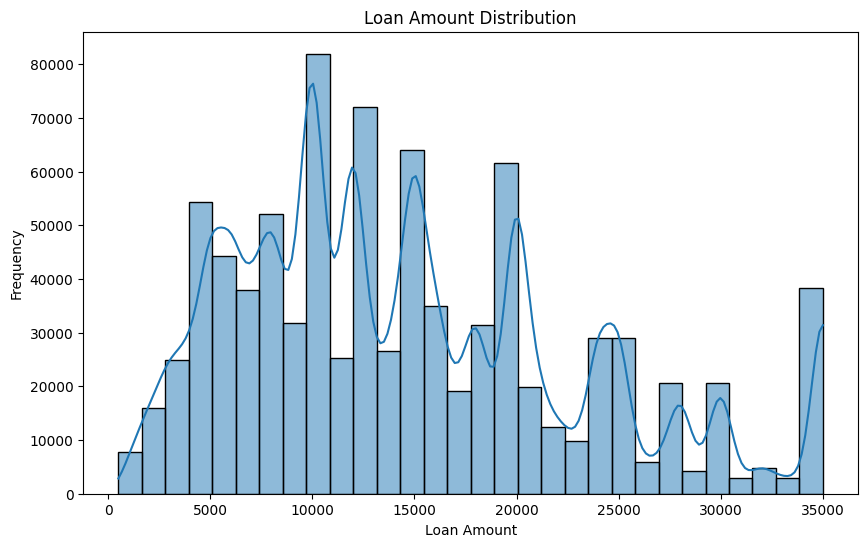

In [14]:
# Visualize the distribution of loan amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['loan_amnt'], bins=30, kde=True)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

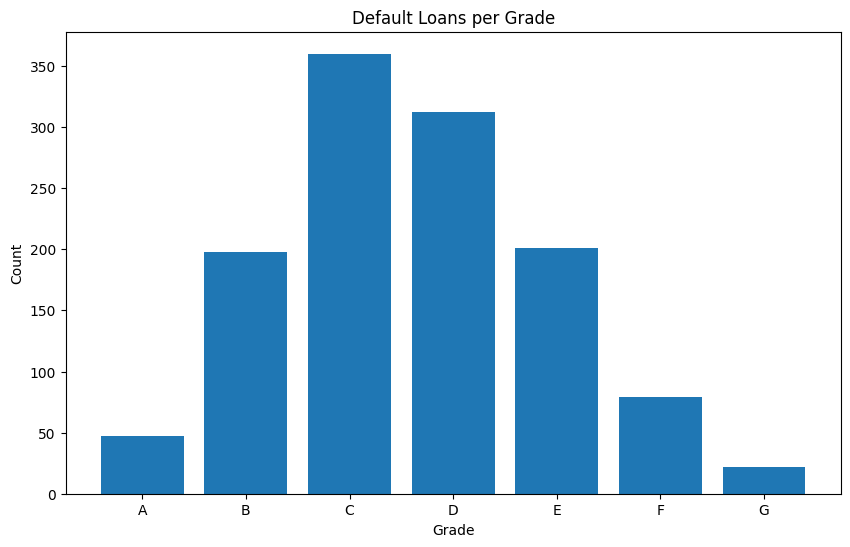

In [15]:
# Filter the DataFrame for loan_status == 'Default'
default_data = df[df['loan_status'] == 'Default']

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(x=sorted(default_data['grade'].unique()), height=default_data['grade'].value_counts().loc[sorted(default_data['grade'].unique())])
plt.title('Default Loans per Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

#### Numerical variables

<AxesSubplot: >

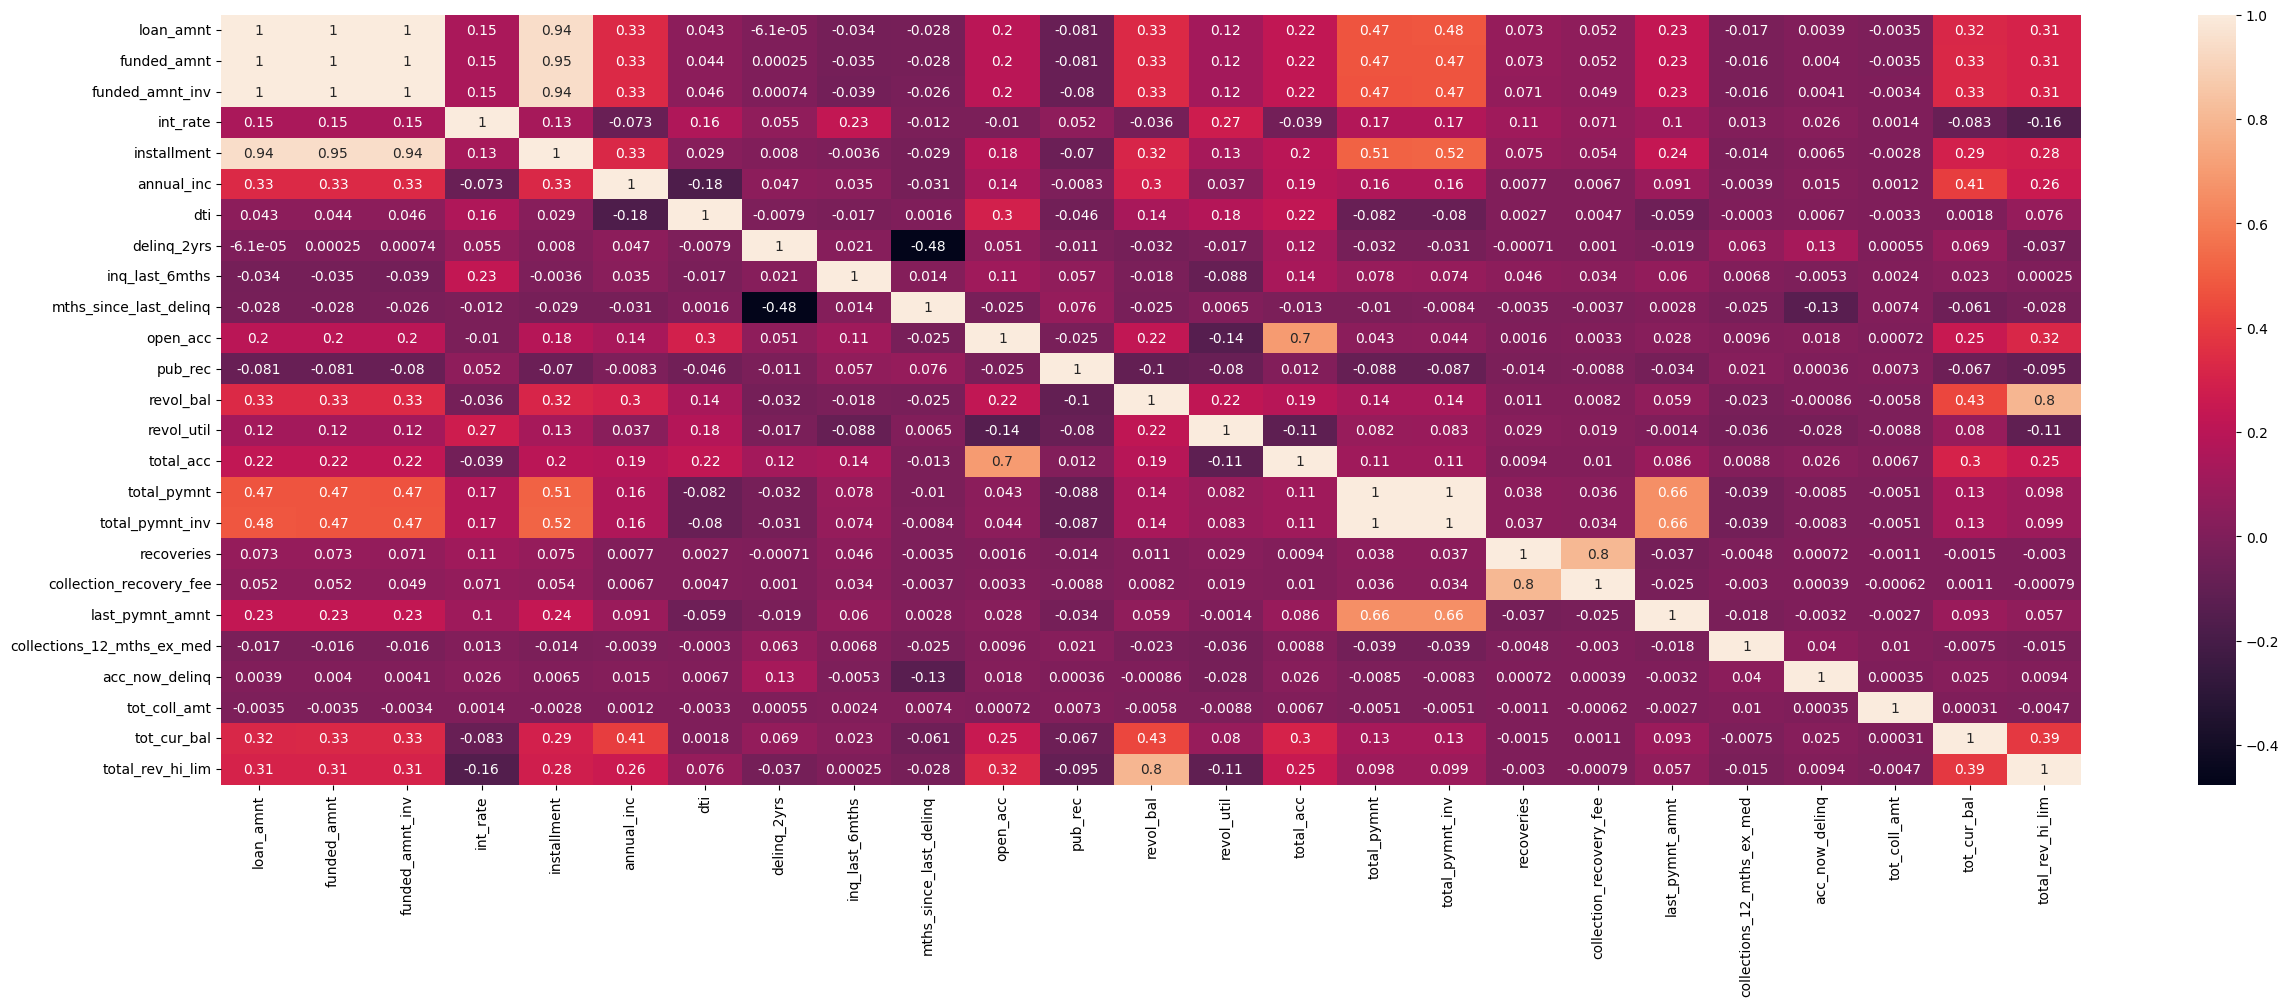

In [54]:
plt.figure(figsize=(30,10))
corr_matrix = df[num_var].corr()
sns.heatmap(corr_matrix, annot = True)

## Data Preparation

In [17]:
#drop columns having na rate > 90%
na_rates = df.isna().sum()/len(df)
drop_columns = na_rates[na_rates > 0.90].index
df.drop(columns = drop_columns, inplace = True)

In [18]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,Office Assistant,8 years,RENT,31000.0,Verified,Jan-2015,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,905xx,CA,28.69,0.0,Sep-2004,0.0,NaN,77.0,9.0,1.0,14037.0,82.1,15.0,f,7055.47,7055.47,3971.88,3971.88,2944.53,1027.35,0.0,0.0,0.0,Jan-2016,332.10,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,0.0,0.0,25274.0,17100.0
887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,Director of Maintenance,10+ years,MORTGAGE,79000.0,Verified,Jan-2015,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,Home improvement,072xx,NJ,3.90,0.0,Mar-1974,1.0,26.0,NaN,5.0,0.0,8621.0,84.5,23.0,f,16933.26,16933.26,9532.39,9532.39,7066.74,2465.65,0.0,0.0,0.0,Jan-2016,797.03,Feb-2016,Jan-2016,0.0,29.0,1.0,INDIVIDUAL,0.0,0.0,140285.0,10200.0
887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,Radiologist Technologist,5 years,RENT,35000.0,Verified,Jan-2015,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,378xx,TN,30.90,0.0,Sep-2003,0.0,NaN,84.0,9.0,1.0,11031.0,61.3,22.0,w,11155.50,11155.50,3769.74,3769.74,1844.50,1925.24,0.0,0.0,0.0,Jan-2016,316.07,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,0.0,0.0,34178.0,18000.0
887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,Painter,1 year,RENT,64400.0,Source Verified,Jan-2015,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,010xx,MA,27.19,1.0,Oct-2003,2.0,22.0,NaN,17.0,0.0,8254.0,30.6,20.0,w,10447.31,10447.31,3787.67,3787.67,1552.69,2234.98,0.0,0.0,0.0,Jan-2016,317.86,Feb-2016,Jan-2016,1.0,22.0,1.0,INDIVIDUAL,0.0,0.0,58418.0,27000.0
887378,36271262,38982659,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,B5,Manager Hotel Operations Oasis,10+ years,RENT,100000.0,Verified,Jan-2015,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,331xx,FL,10.83,0.0,Dec-2001,1.0,NaN,110.0,8.0,1.0,33266.0,79.8,10.0,f,14110.94,14110.94,7943.76,7943.76,5889.06,2054.70,0.0,0.0,0.0,Jan-2016,664.20,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,0.0,0.0,33307.0,41700.0


In [19]:
df = df.drop(columns=["desc", "title", "url", "policy_code", 'id', 'member_id', 'zip_code', 'next_pymnt_d', 'mths_since_last_record', 'mths_since_last_major_derog'])
#policy_code take 1 when the policy is publicly available and 2 otherwise. we drop it since it take constant value of 1
#desc: loan description provided by the borrower ==> have no value to analyze.
#title: The loan title provided by the borrower ==> have no value to analyze.
#url: URL for the LC page with listing data ==> have no value to analyze
#zip_code has no value to analyze
#next_pymnt_d' has no value to analyze
#id and member_id have no value to analyze
#mths_since_last_record and mths_since_last_major_derog have no value to analyze

In [20]:
#'pymnt_plan' just have 10 value of True while having 887369 values of False
#application_type has low variance 
low_var_columns = ['pymnt_plan', "application_type"]
df.drop(columns = df[low_var_columns], inplace = True)

In [21]:
# total_pymnt = total_rec_int + total_rec_prncp + total_rec_late_fee
# total_pymnt_inv = total_rec_int + total_rec_prncp + total_rec_late_fee
# out_prncp = funded_amnt - total_rec_prncp
# out_prncp_inv = funded_amnt_inv - total_rec_prncp
derived_columns = ['total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', "out_prncp", "out_prncp_inv"]
df.drop(columns = df[derived_columns], inplace = True)

In [22]:
#remove grade since we already have sub_grade which is more detail than grade
df.drop(columns = 'grade', inplace = True)

In [23]:
df.duplicated().sum()

0

In [24]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,credit_card,AZ,27.65,0.0,Jan-1985,1.0,NaN,3.0,0.0,13648.0,83.7,9.0,f,5861.071414,5831.78,0.00,0.00,Jan-2015,171.62,Jan-2016,0.0,0.0,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,car,GA,1.00,0.0,Apr-1999,5.0,NaN,3.0,0.0,1687.0,9.4,4.0,f,1008.710000,1008.71,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,0.0,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,small_business,IL,8.72,0.0,Nov-2001,2.0,NaN,2.0,0.0,2956.0,98.5,10.0,f,3003.653644,3003.65,0.00,0.00,Jun-2014,649.91,Jan-2016,0.0,0.0,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,other,CA,20.00,0.0,Feb-1996,1.0,35.0,10.0,0.0,5598.0,21.0,37.0,f,12226.302212,12226.30,0.00,0.00,Jan-2015,357.48,Jan-2015,0.0,0.0,NaN,NaN,NaN
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,other,OR,17.94,0.0,Jan-1996,0.0,38.0,15.0,0.0,27783.0,53.9,38.0,f,3242.170000,3242.17,0.00,0.00,Jan-2016,67.79,Jan-2016,0.0,0.0,NaN,NaN,NaN


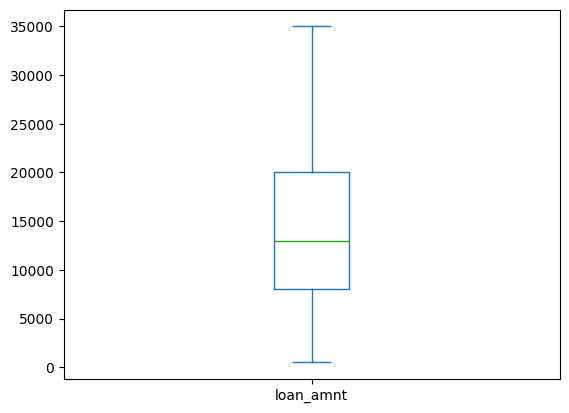

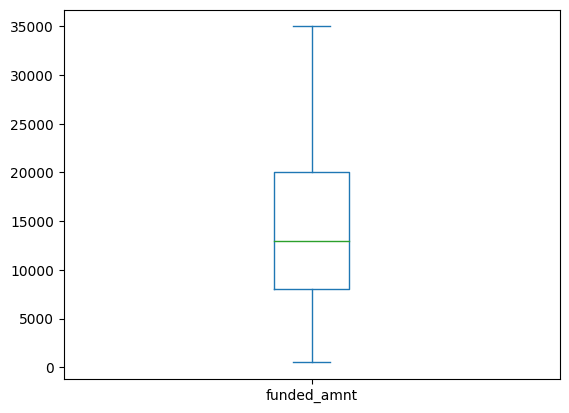

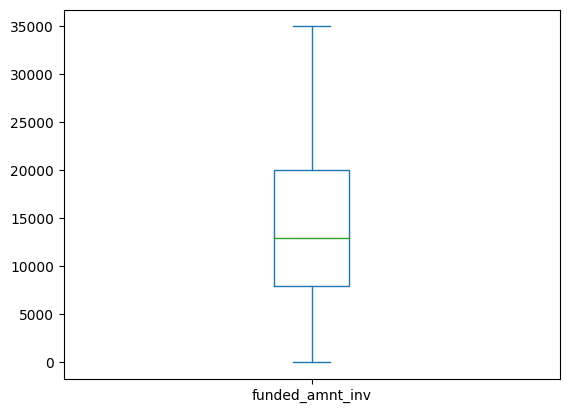

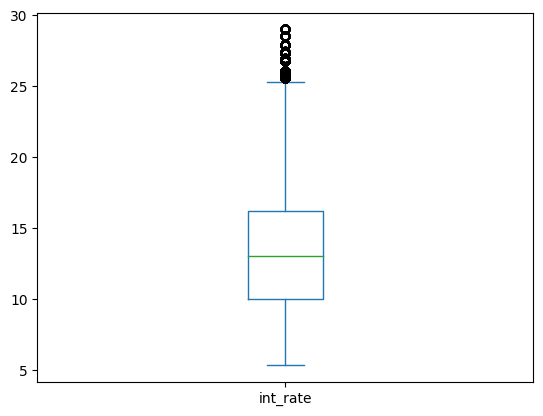

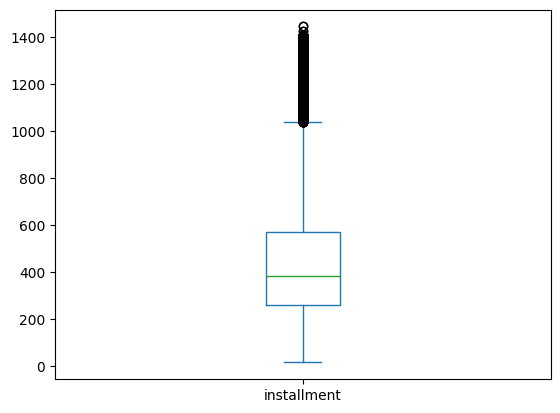

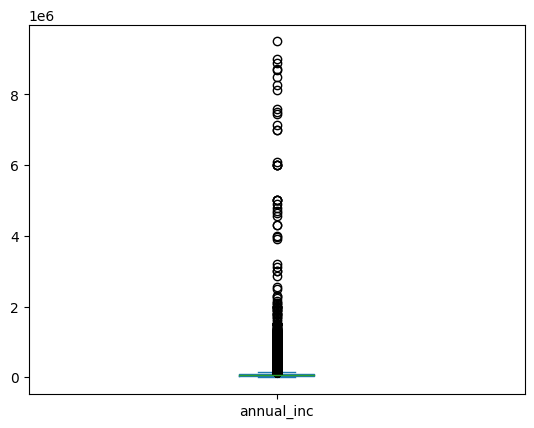

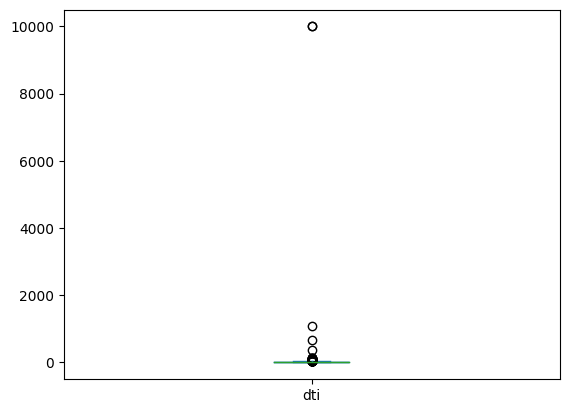

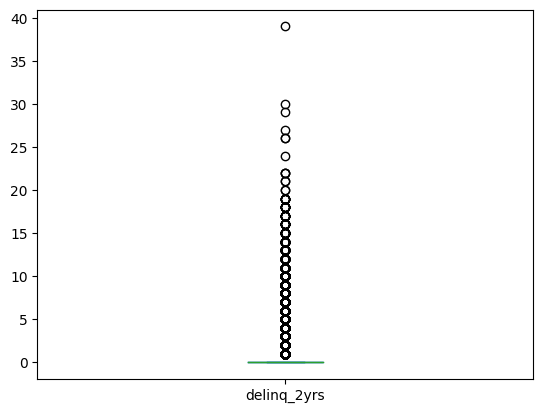

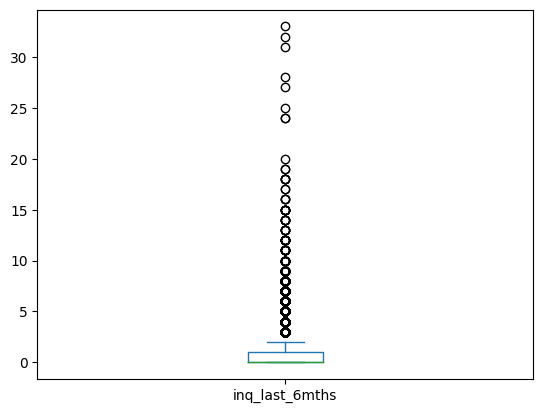

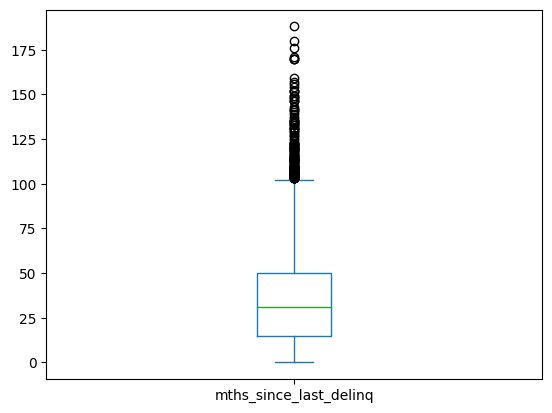

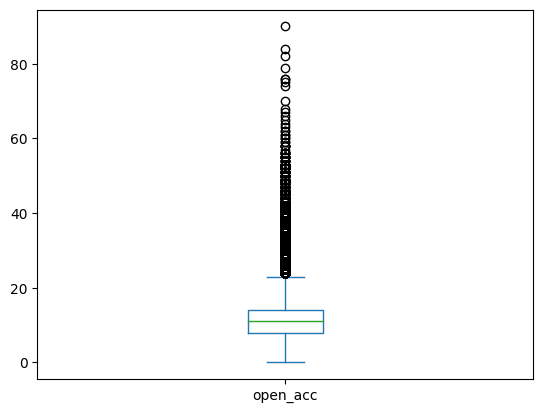

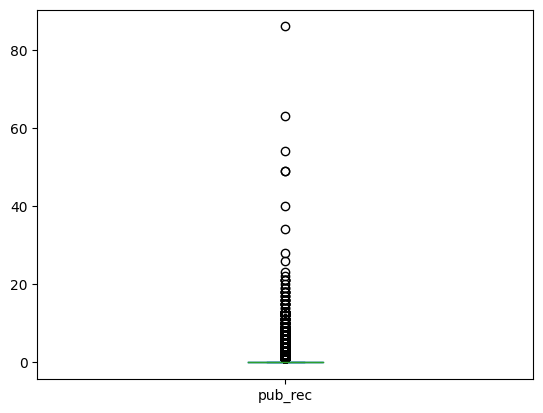

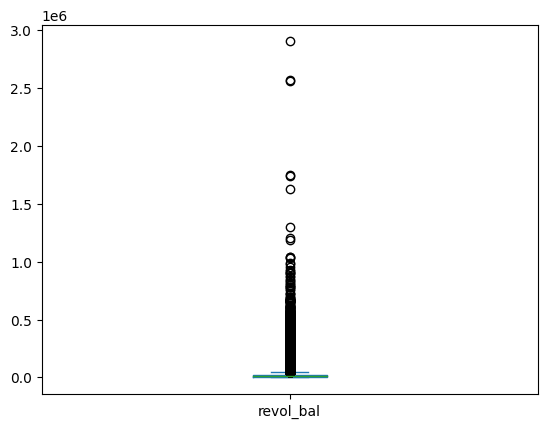

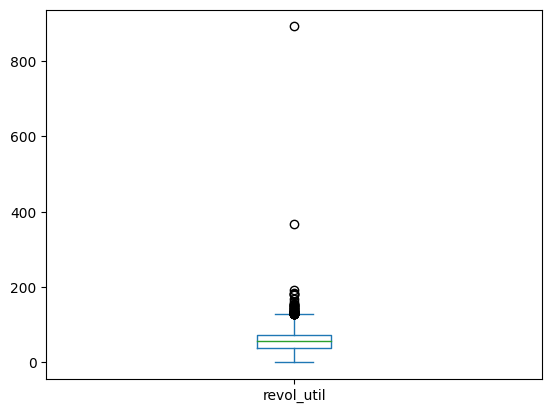

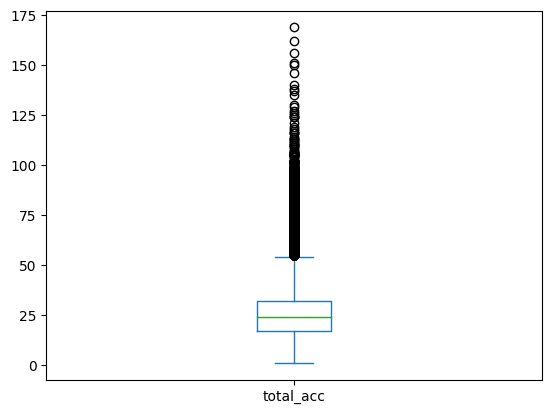

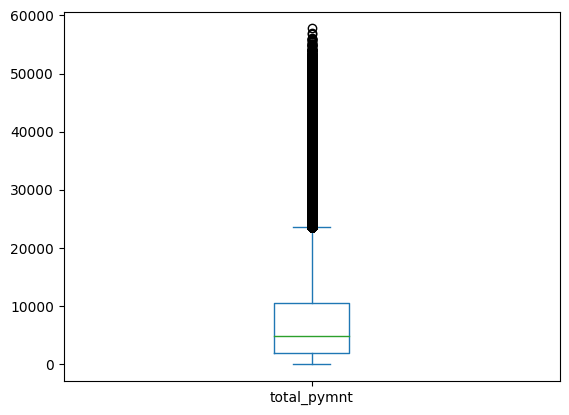

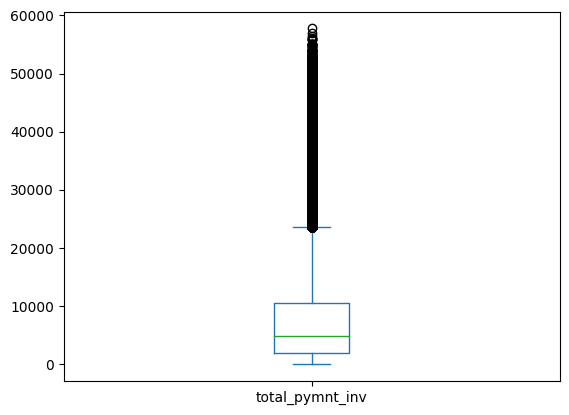

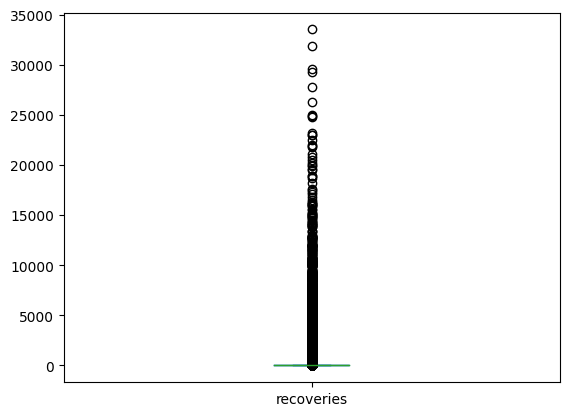

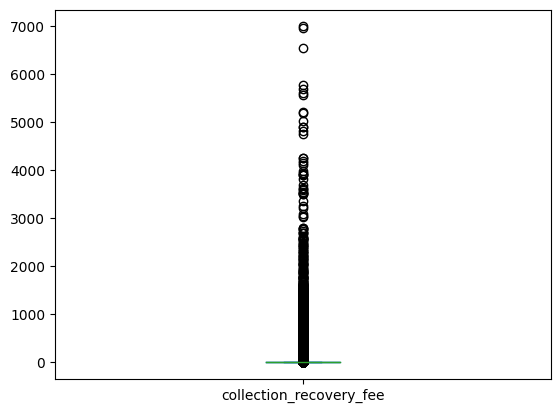

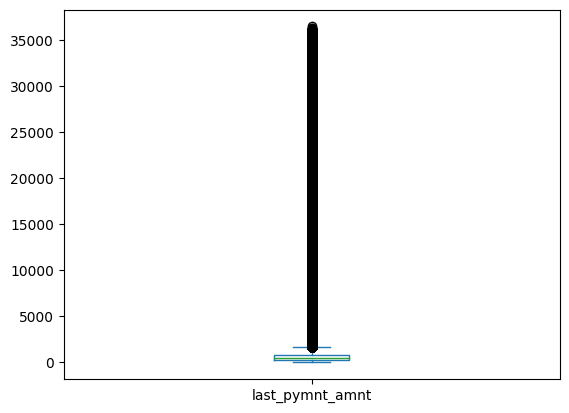

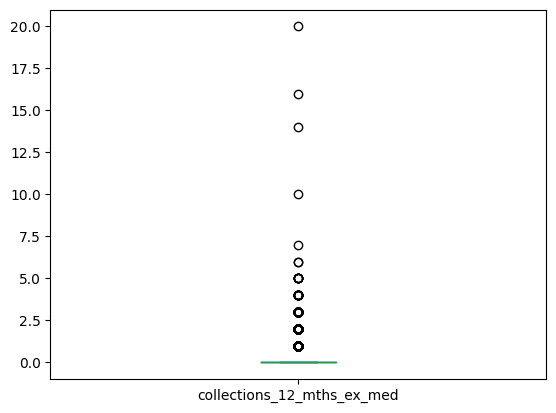

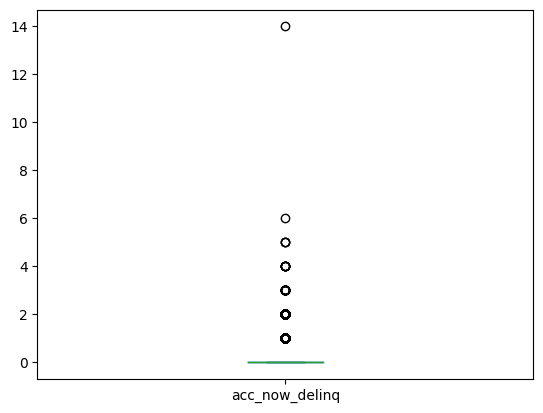

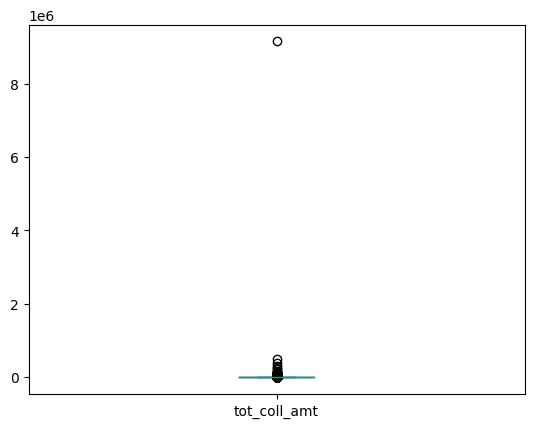

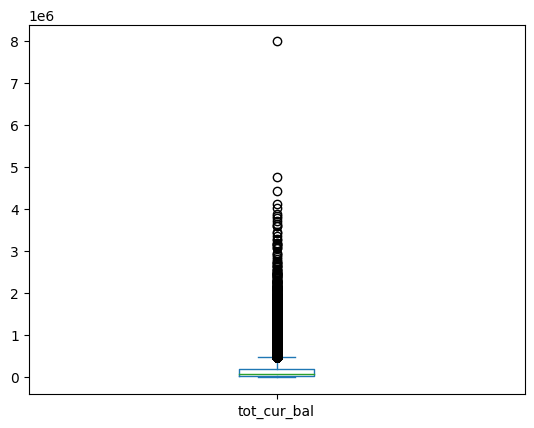

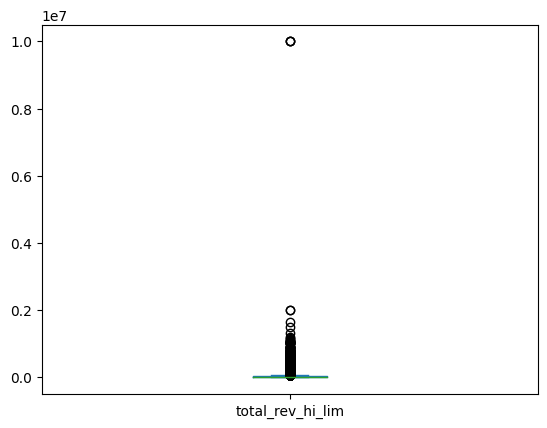

In [25]:
cat_var=df.select_dtypes(include=["object"]).columns
num_var=df.select_dtypes(include=["int","float"]).columns
for var in num_var:
    df[var].plot(kind = 'box')
    plt.show()

In [26]:
df = df[df['dti']<9000]
df = df[df['revol_util']<800]

In [27]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,credit_card,AZ,27.65,0.0,Jan-1985,1.0,NaN,3.0,0.0,13648.0,83.7,9.0,f,5861.071414,5831.78,0.00,0.00,Jan-2015,171.62,Jan-2016,0.0,0.0,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,car,GA,1.00,0.0,Apr-1999,5.0,NaN,3.0,0.0,1687.0,9.4,4.0,f,1008.710000,1008.71,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,0.0,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,small_business,IL,8.72,0.0,Nov-2001,2.0,NaN,2.0,0.0,2956.0,98.5,10.0,f,3003.653644,3003.65,0.00,0.00,Jun-2014,649.91,Jan-2016,0.0,0.0,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,other,CA,20.00,0.0,Feb-1996,1.0,35.0,10.0,0.0,5598.0,21.0,37.0,f,12226.302212,12226.30,0.00,0.00,Jan-2015,357.48,Jan-2015,0.0,0.0,NaN,NaN,NaN
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,other,OR,17.94,0.0,Jan-1996,0.0,38.0,15.0,0.0,27783.0,53.9,38.0,f,3242.170000,3242.17,0.00,0.00,Jan-2016,67.79,Jan-2016,0.0,0.0,NaN,NaN,NaN


In [28]:
df.isna().sum().sort_values(ascending = False)

mths_since_last_delinq        454091
tot_coll_amt                   70155
total_rev_hi_lim               70155
tot_cur_bal                    70155
emp_title                      51426
emp_length                     44808
last_pymnt_d                   17645
collections_12_mths_ex_med       113
last_credit_pull_d                52
last_pymnt_amnt                    0
open_acc                           0
collection_recovery_fee            0
acc_now_delinq                     0
total_pymnt_inv                    0
total_pymnt                        0
initial_list_status                0
total_acc                          0
revol_util                         0
revol_bal                          0
pub_rec                            0
recoveries                         0
loan_amnt                          0
funded_amnt                        0
annual_inc                         0
funded_amnt_inv                    0
term                               0
int_rate                           0
i

In [29]:
cat_var

Index(['term', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d'],
      dtype='object')

In [43]:
from sklearn.preprocessing import LabelEncoder
column_to_encode = cat_var

label_encoder = LabelEncoder()
for column in column_to_encode:
    label_encoder.fit(df[column])
    df[column] = label_encoder.transform(df[column])

In [44]:
column_to_fillna = ['mths_since_last_delinq', 'open_acc','pub_rec', 'delinq_2yrs','earliest_cr_line','inq_last_6mths','revol_util', 'total_acc', 
                    'last_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'acc_now_delinq','tot_coll_amt','tot_cur_bal','total_rev_hi_lim']
for i in column_to_fillna:
    df[i].fillna(df[i].median(), inplace = True)

# emp_title, emp_length be the employee tilte and employee length, so they will take zero value for each NaN value
for emp in ['emp_title', 'emp_length']:
    df[emp].fillna(0, inplace = True) 

In [45]:
#conver value of 'loan_status' into binary
df['loan_status'].replace({"Charged Off":0, "Late (31-120 days)":0,"Late (16-30 days)":0, "Default":0, "In Grace Period":0, "Does not meet the credit policy. Status:Charged Off":0, "Issued":0,
                           "Current":1, "Fully Paid":1, "Does not meet the credit policy. Status:Fully Paid":1}, inplace = True)

## Modelling

In [46]:
target_names = ['Default', 'Normal']

In [47]:
df['loan_status'].value_counts()

loan_status
1    811055
0     75819
Name: count, dtype: int64

In [48]:
model_features = list(set(df.columns).difference({'loan_status'}))
target = 'loan_status'

X = df[model_features]
y = df[target]

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size=0.3)

In [53]:
# Enter your code here
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.base import BaseSampler
from sklearn.metrics import classification_report

model_smote = RandomForestClassifier(n_estimators=3,
                                max_depth=10,
                                min_samples_split=400,
                                random_state=12)
pipe = make_pipeline(RandomOverSampler(sampling_strategy=1, random_state=0), model_smote)
pipe.fit(X_train, y_train)

Pipeline(steps=[('randomoversampler',
                 RandomOverSampler(random_state=0, sampling_strategy=1)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10, min_samples_split=400,
                                        n_estimators=3, random_state=12))])

In [52]:
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Default       0.60      0.81      0.69     22577
      Normal       0.98      0.95      0.97    243486

    accuracy                           0.94    266063
   macro avg       0.79      0.88      0.83    266063
weighted avg       0.95      0.94      0.94    266063



## Conclusion

#### Overall, the result shows that the accuracy score is very high: 0.95, which means that Random Forest algorithm has the probability of 95% of exactly predicting.

#### On the other hand, in this case, we mainly focus on predicting defaulted customer, so f1_score should be the preferential metrics. With the probability of 73% of predicting a customer who will be defaulted or not, Random Forest still be a reliable algorithm for predicting defaulted customer.